In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('stock_data.csv',header=[0,1],skiprows=[2],parse_dates=True)

In [3]:
df.shape

(1295, 6523)

In [4]:
df.set_index(df.columns[0],inplace=True)
df.index.name="Date"
df.index=pd.to_datetime(df.index)

In [5]:
for i in df.columns:
    df[i]=df[i].fillna(method='ffill').fillna(method='bfill')

In [6]:
df.head()

GLOBUSSPR.NS                                                       \
                   Open       High        Low      Close  Adj Close   Volume   
Date                                                                           
2015-02-20    61.900002  61.950001  60.200001  60.400002  60.400002  32704.0   
2015-02-23    61.900002  61.950001  60.200001  60.400002  60.400002  32704.0   
2015-02-24    61.349998  61.349998  58.950001  59.250000  59.250000  26033.0   
2015-02-25    59.500000  60.950001  59.500000  59.650002  59.650002  21673.0   
2015-02-26    60.549999  60.549999  58.400002  58.549999  58.549999  27865.0   

           AGRITECH.NS                    ...  RKFORGE.NS              \
                  Open  High   Low Close  ...         Low       Close   
Date                                      ...                           
2015-02-20        6.00  6.15  6.00  6.15  ...  447.000000  454.000000   
2015-02-23        6.00  6.15  6.00  6.15  ...  447.000000  454.000000   
2015-02-24        6.05  6.45  6.05  6.45  ...  436.600006  442.549988   
2015-02-25        6.25  6.75  6.25  6.75  ...  443.000000  448.649994   
2015-02-26        6.50  7.05  6.50  6.70  ...  430.000000  437.450012   

                                VAKRANGEE.NS                                   \
             Adj Close   Volume         Open       High        Low      Close   
Date                                                                            
2015-02-20  446.480896  29128.0    65.025002  67.000000  63.474998  65.000000   
2015-02-23  446.480896  29128.0    65.025002  67.000000  63.474998  65.000000   
2015-02-24  435.220520  22574.0    64.000000  65.099998  63.275002  63.775002   
2015-02-25  441.219513  31029.0    63.000000  64.025002  62.775002  63.375000   
2015-02-26  430.205048  24995.0    63.299999  63.700001  61.750000  61.849998   

                                  
            Adj Close     Volume  
Date                              
2015-02-20  62.598267  1236900.0  
2015-02-23  62.598267  1236900.0  
2015-02-24  61.418545   940008.0  
2015-02-25  61.033318   372008.0  
2015-02-26  59.564663   844006.0  

[5 rows x 6522 columns]

In [7]:
for i in df.columns:
    if(any(df[i].isna())):
        print(i)

In [8]:
X=df['GLOBUSSPR.NS']

In [9]:
X_train=X[X.index<'2020-01-01']
X_train.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-24,139.899994,142.800003,137.050003,140.899994,140.899994,392720.0
2019-12-26,141.350006,143.850006,139.050003,141.600006,141.600006,126214.0
2019-12-27,142.699997,143.949997,138.350006,138.850006,138.850006,49632.0
2019-12-30,140.000000,142.899994,139.399994,140.149994,140.149994,73693.0
2019-12-31,141.649994,144.000000,140.550003,141.800003,141.800003,100023.0


In [10]:
X_train.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-20,61.900002,61.950001,60.200001,60.400002,60.400002,32704.0
1,2015-02-23,61.900002,61.950001,60.200001,60.400002,60.400002,32704.0
2,2015-02-24,61.349998,61.349998,58.950001,59.250000,59.250000,26033.0
3,2015-02-25,59.500000,60.950001,59.500000,59.650002,59.650002,21673.0
4,2015-02-26,60.549999,60.549999,58.400002,58.549999,58.549999,27865.0
...,...,...,...,...,...,...,...
1252,2019-12-24,139.899994,142.800003,137.050003,140.899994,140.899994,392720.0
1253,2019-12-26,141.350006,143.850006,139.050003,141.600006,141.600006,126214.0
1254,2019-12-27,142.699997,143.949997,138.350006,138.850006,138.850006,49632.0
1255,2019-12-30,140.000000,142.899994,139.399994,140.149994,140.149994,73693.0


In [11]:
X_train=X_train.iloc[:,0:1]

In [12]:
X_train

,Open
Date,
2015-02-20,61.900002
2015-02-23,61.900002
2015-02-24,61.349998
2015-02-25,59.500000
2015-02-26,60.549999
...,...
2019-12-24,139.899994
2019-12-26,141.350006
2019-12-27,142.699997


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(np.array(X_train))

In [14]:
df_train=[]
y_train=[]

for i in range(60,1257): ## Starting from 31st entry 
    df_train.append(X_train_scaled[i-60:i,0]) ## 0:29(i.e past 30 values) for i=30
    y_train.append(X_train_scaled[i]) ##current value (ground truth)
    
df_train,y_train=np.array(df_train),np.array(y_train)

In [15]:
df_train.shape

(1197, 60)

In [16]:
df_train=np.reshape(df_train,(df_train.shape[0],df_train.shape[1],1))

In [17]:
X_test=X[(X.index>='2020-01-01') & (X.index<'2020-02-01')]

In [18]:
X_test=X_test.iloc[:,0:1]

In [19]:
temp_x=pd.concat((X_train,X_test),axis=0)

In [20]:
temp_x_scaled=scaler.transform(temp_x)

In [21]:
df_test=[]
y_test=[]
for i in range(1257,temp_x_scaled.shape[0]):
    df_test.append(temp_x_scaled[i-60:i,0])
    y_test.append(temp_x_scaled[i])

    
    

In [22]:
df_test,y_test=np.array(df_test),np.array(y_test)

In [23]:
df_test=np.reshape(df_test,(df_test.shape[0],df_test.shape[1],1))

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [25]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(df_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))


regressor.add(Dense(units=1))





Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [26]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [27]:
regressor.fit(df_train,y_train,epochs=100,batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1197/1197 [==============================] - 28s 23ms/step - loss: 0.0309
Epoch 2/100
1197/1197 [==============================] - 13s 11ms/step - loss: 0.0073
Epoch 3/100
1197/1197 [==============================] - 10s 8ms/step - loss: 0.0061
Epoch 4/100
1197/1197 [==============================] - 11s 10ms/step - loss: 0.0060
Epoch 5/100
1197/1197 [==============================] - 11s 9ms/step - loss: 0.0058
Epoch 6/100
1197/1197 [==============================] - 9s 8ms/step - loss: 0.0063
Epoch 7/100
1197/1197 [==============================] - 10s 8ms/step - loss: 0.0052
Epoch 8/100
1197/1197 [==============================] - 9s 7ms/step - loss: 0.0051
Epoch 9/100
1197/1197 [==============================] - 10s 8ms/step - loss: 0.0046
Epoch 10/100
1197/1197 [==============================] - 12s 10ms/step - loss: 0.0042
Epoch 11/100
1197/1197 [==============================] - 10s 9ms/step - loss: 0.0043
Epoch 12/100


In [28]:
predicted_values=regressor.predict(df_test)
predicted_values=scaler.inverse_transform(predicted_values)

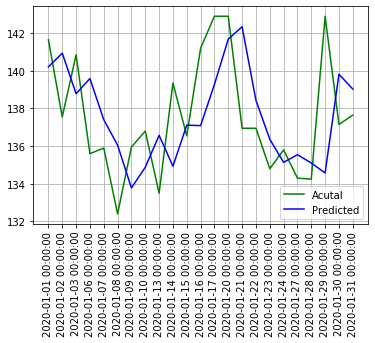

In [29]:
plt.figure()
plt.plot(X_test.values,color='green',label='Acutal')
plt.plot(predicted_values,color='blue',label='Predicted')
plt.xticks(ticks=range(len(X_test)),labels=X_test.index,rotation=90)
plt.grid()
plt.legend()



#### Stock_Model_Data

In [2]:
df=pd.read_csv('stock_model_data_v3.0.csv')

In [4]:
for i in df.columns:
    if(any(df[i].isna())):
        print(i)

In [3]:
df.shape

(1375085, 49)

In [5]:
df=df.iloc[:50000,:]

In [6]:
df.shape

(50000, 49)

In [7]:
df.head()

,Symbols,Date,bin_gain,bin_gain_1%,bin_gain_2%,SMA_PCH5,SMA_PCH15,SMA_PCH50,EMA_PCH5,EMA_PCH15,...,MOM_BIN50,macd_BIN,Beta_DOW,Beta_NDQ,Beta_NKK,Beta_NFTY,Beta_EURINR,Beta_GBPINR,Beta_USDINR,Beta_JPYINR
0,20MICRONS.NS,2015-03-17,0,0,0,-0.028324,-0.619374,-5.776217,-0.128374,-1.196622,...,1,0,-0.027104,-0.062579,-0.016417,0.162006,-0.296453,-0.168612,0.020377,-0.017248
1,20MICRONS.NS,2015-03-18,1,0,0,-0.594737,-0.959373,-6.527129,-0.463886,-1.540035,...,1,0,-0.063537,-0.115363,0.089180,0.357055,-0.329759,-0.249793,0.038237,-0.079502
2,20MICRONS.NS,2015-03-19,0,0,0,-0.141833,-0.593041,-6.477486,-0.120266,-1.103674,...,1,1,-0.084301,-0.110805,0.062925,0.333051,-0.227927,-0.189294,0.040711,-0.038782
3,20MICRONS.NS,2015-03-20,0,0,0,-0.284095,-0.847463,-6.982913,-0.269718,-1.213539,...,1,1,-0.036456,-0.083404,0.068255,0.321459,-0.219496,-0.173907,0.054477,-0.040057
4,20MICRONS.NS,2015-03-23,1,0,0,-1.541101,-2.293976,-8.773608,-1.325062,-2.548441,...,1,0,-0.018645,-0.037138,-0.025653,0.333212,-0.380410,-0.298181,0.070855,-0.092486


In [5]:
df.columns

Index(['Symbols', 'Date', 'bin_gain', 'bin_gain_1%', 'bin_gain_2%', 'SMA_PCH5',
       'SMA_PCH15', 'SMA_PCH50', 'EMA_PCH5', 'EMA_PCH15', 'EMA_PCH50', 'ROC5',
       'ROC15', 'ROC50', 'MOM_PCH5', 'MOM_PCH15', 'MOM_PCH50', 'macdhist',
       'RSI', 'StochK', 'StochD', 'CMO', 'AroonUp', 'AroonDown', 'ChaikinAD',
       'MFI', 'WillR', 'ULTOS', 'MA_BIN5', 'MA_BIN15', 'MA_BIN50', 'EMA_BIN5',
       'EMA_BIN15', 'EMA_BIN50', 'ROC_BIN5', 'ROC_BIN15', 'ROC_BIN50',
       'MOM_BIN5', 'MOM_BIN15', 'MOM_BIN50', 'macd_BIN', 'Beta_DOW',
       'Beta_NDQ', 'Beta_NKK', 'Beta_NFTY', 'Beta_EURINR', 'Beta_GBPINR',
       'Beta_USDINR', 'Beta_JPYINR'],
      dtype='object')

In [8]:
df.set_index("Date",inplace=True)
df.index=pd.to_datetime(df.index)
df.index

DatetimeIndex(['2015-03-17', '2015-03-18', '2015-03-19', '2015-03-20',
               '2015-03-23', '2015-03-24', '2015-03-25', '2015-03-26',
               '2015-03-27', '2015-03-30',
               ...
               '2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15'],
              dtype='datetime64[ns]', name='Date', length=50000, freq=None)

In [10]:
df['Symbols'].value_counts()

APLLTD.NS        1214
VSTTILLERS.NS    1214
HERCULES.NS      1214
AARTIDRUGS.NS    1214
NATHBIOGEN.NS    1214
                 ... 
KRISHANA.NS         6
BAJAJHIND.NS        6
CSBBANK.NS          5
AIONJSW.NS          4
UNITY.NS            3
Name: Symbols, Length: 1464, dtype: int64

In [9]:
X_train=[]
y_train=[]
def print_i(df):
    if(len(df)<110):
        return
    for i in range(50,len(df)-50):
        X_train.append(df.iloc[i-50:i,1:].values)
        y_train.append(df.iloc[i,3])
    
df.groupby(["Symbols"]).apply(print_i)

""


In [ ]:
X_train

In [10]:
X_test=[]
y_test=[]
def prepare_test(df):
    if(len(df)<110):
        return
    for i in range(len(df)-50,len(df)):
        X_test.append(df.iloc[i-50:i,1:].values)
        y_test.append(df.iloc[i,3])
df.groupby(["Symbols"]).apply(prepare_test)

""


In [11]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_test,y_test=np.array(X_test),np.array(y_test)

In [39]:
X_train.shape

(44393, 50, 47)

In [13]:
X_test.shape

(2750, 50, 47)

In [26]:
a=np.array([[1,2,3],[4,5,6]])
a.reshape(1,-1).reshape(2,3)

array([[1, 2, 3],
       [4, 5, 6]])

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [15]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],47)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))


model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model.fit(X_train, y_train, batch_size=1000, nb_epoch=20)

Instructions for updating:
Use tf.cast instead.


C:\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
44393/44393 [==============================] - 111s 2ms/step - loss: 0.4766 - acc: 0.8225
Epoch 2/20
44393/44393 [==============================] - 103s 2ms/step - loss: 0.4555 - acc: 0.8314
Epoch 3/20
44393/44393 [==============================] - 109s 2ms/step - loss: 0.4555 - acc: 0.8314
Epoch 4/20
44393/44393 [==============================] - 101s 2ms/step - loss: 0.4548 - acc: 0.8314
Epoch 5/20
44393/44393 [==============================] - 92s 2ms/step - loss: 0.4543 - acc: 0.8314
Epoch 6/20
44393/44393 [==============================] - 91s 2ms/step - loss: 0.4544 - acc: 0.8314
Epoch 7/20
44393/44393 [==============================] - 97s 2ms/step - loss: 0.4541 - acc: 0.8315
Epoch 8/20
44393/44393 [==============================] - 99s 2ms/step - loss: 0.4535 - acc: 0.8315
Epoch 9/20
44393/44393 [==============================] - 130s 3ms/step - loss: 0.4543 - acc: 0.8316
Epoch 10/20
44393/44393 [==============================] - 104s 2ms/step - loss: 0.4537 - acc: 

In [17]:
model.evaluate(X_test,y_test,batch_size=1)

2750/2750 [==============================] - 55s 20ms/step


[0.4795377104959705, 0.8185454545454546]

In [18]:
model=Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],47)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100))
model.add(Dropout(0.2))


model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

In [19]:
model.fit(X_train, y_train, batch_size=1000, nb_epoch=20)

Epoch 1/20
44393/44393 [==============================] - 260s 6ms/step - loss: 0.4653 - acc: 0.8310
Epoch 2/20
44393/44393 [==============================] - 153s 3ms/step - loss: 0.4566 - acc: 0.8314
Epoch 3/20
44393/44393 [==============================] - 118s 3ms/step - loss: 0.4552 - acc: 0.8313
Epoch 4/20
44393/44393 [==============================] - 122s 3ms/step - loss: 0.4547 - acc: 0.8315
Epoch 5/20
44393/44393 [==============================] - 127s 3ms/step - loss: 0.4551 - acc: 0.8316
Epoch 6/20
44393/44393 [==============================] - 147s 3ms/step - loss: 0.4545 - acc: 0.8315
Epoch 7/20
44393/44393 [==============================] - 90s 2ms/step - loss: 0.4543 - acc: 0.8315
Epoch 9/20
44393/44393 [==============================] - 90s 2ms/step - loss: 0.4538 - acc: 0.8316
Epoch 10/20
44393/44393 [==============================] - 90s 2ms/step - loss: 0.4536 - acc: 0.8315
Epoch 11/20
44393/44393 [==============================] - 89s 2ms/step - loss: 0.4535 - acc:

#### Random Forest

In [137]:
df_train.index

DatetimeIndex(['2015-03-17', '2015-03-17', '2015-03-17', '2015-03-17',
               '2015-03-17', '2015-03-17', '2015-03-17', '2015-03-17',
               '2015-03-17', '2015-03-17',
               ...
               '2020-02-18', '2020-02-18', '2020-02-18', '2020-02-18',
               '2020-02-18', '2020-02-18', '2020-02-18', '2020-02-18',
               '2020-02-18', '2020-02-18'],
              dtype='datetime64[ns]', name='Date', length=1102617, freq=None)

In [140]:
df_test=df_subset[df_subset.index>='2020-02-19']
df_test.head()

,bin_gain,bin_gain_1%,bin_gain_2%,SMA_PCH5,SMA_PCH15,SMA_PCH50,EMA_PCH5,EMA_PCH15,EMA_PCH50,ROC5,...,MOM_BIN50,macd_BIN,Beta_DOW,Beta_NDQ,Beta_NKK,Beta_NFTY,Beta_EURINR,Beta_GBPINR,Beta_USDINR,Beta_JPYINR
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-19,0,0,0,-0.083435,-5.423190,-9.918378,-0.413229,-5.026705,-9.290481,-2.044990,...,0,0,-0.039830,-0.116234,0.071655,0.216281,-0.074886,-0.093949,0.003792,-0.057048
2020-02-19,1,1,0,0.453605,-2.756228,-3.823274,0.019421,-1.973967,-3.036060,-1.640437,...,1,0,0.048040,-0.093151,0.198153,-0.040712,0.011812,0.075510,-0.033569,-0.066131
2020-02-19,0,0,0,1.498947,0.557620,1.671011,1.238988,0.569681,1.763745,3.468054,...,1,0,0.066230,0.041804,0.054788,0.187718,-0.055520,-0.087009,0.000996,-0.039312
2020-02-19,0,0,0,-5.824043,-12.425582,-15.024459,-4.806803,-11.077480,-17.173848,-12.643677,...,0,0,0.075114,0.025741,0.026370,0.107172,-0.046267,-0.059126,-0.017105,-0.042540
2020-02-19,0,0,0,5.888256,11.797952,18.543765,4.798931,9.423687,16.202761,4.628098,...,1,1,0.037577,0.003829,0.119772,0.136221,-0.042104,-0.072636,0.003153,-0.045078


In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
y_train=df_train['bin_gain_2%']
df_train.drop('bin_gain_2%',axis=1,inplace=True)
y_test=df_test['bin_gain_2%']
df_test.drop('bin_gain_2%',axis=1,inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [164]:
rf=RandomForestClassifier(n_estimators=50,max_depth=10,max_features=10)
rf.fit(df_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [165]:
rf.score(df_train,y_train)

0.8935786406340551

In [166]:
rf.score(df_test,y_test)

0.8481848184818482

In [ ]:
X-train